# This script contains the following:
- Import libraries
- Load dataframe
- Data wrangling
- Regional segmentation
- Create cross tab for spending habits between the different U.S.regions
- Create a bar chart for spending habits
- Exclusion of low activity customers
- Export


# Import Libraries

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


# Import dataframes

In [11]:
# Define full absolute paths
path = r'/Users/macbook/Dropbox/Mac/Documents/Pro/Data Analyst/Course_Career foundry/A4_Python/2023.08_Instacart basket analysis/02_data'
all_data_file_path = os.path.join(path, 'prepared data', 'all_data')

# Import the dataframe
df = pd.read_pickle(all_data_file_path)  # Use pd.read_pickle() for pickle files

# Data wrangling



## Security & privacy check

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   number_order_client     int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              float64
 7   add_to_cart_order       float64
 8   reordered               float64
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest_day             object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  mean_price              float64
 20  spending_flag           object 
 21  median_days             float

In [13]:
# looking at the dataframe's column headers
df.columns

Index(['order_id', 'user_id', 'number_order_client', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days', 'frequency_flag',
       'surname', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income'],
      dtype='object')

### NOTE: 'surname' is a sensitive data. we will ignore this column in our analysis

In [14]:
# check the columns content and remove the ones irrelevant for our analysis
df.head()

,order_id,user_id,number_order_client,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days,frequency_flag,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [15]:
# Check columns
df.columns

Index(['order_id', 'user_id', 'number_order_client', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days', 'frequency_flag',
       'surname', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income'],
      dtype='object')

### NOTE: 'aisle_id' doesn't seem relevant for now. we will drop those from our working dataframe

## Creating a subset without irrelevant & sensitive data

In [16]:
# drop the columns with irrelevant & sensitive data
df.drop(columns=['surname', 'aisle_id'], inplace=True)
df.columns # check the columns drop


Index(['order_id', 'user_id', 'number_order_client', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'department_id',
       'prices', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'median_days', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

In [17]:
# double checking the drop
df.head()

,order_id,user_id,number_order_client,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_days,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


# Create a regional segmentation of data

In [18]:
# Defining regions

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [19]:
# Assign States to a region

df.loc[df['state'].isin(Northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin(Midwest), 'region'] = 'Midwest'
df.loc[df['state'].isin(South), 'region'] = 'South'
df.loc[df['state'].isin(West), 'region'] = 'West'

In [20]:
# Checking segmentation
df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

# Create Cross tab for spending habits between the different U.S.regions


In [21]:
# Create a crosstab of regions and spending flag
spending_region = pd.crosstab(df['region'], df['spending_flag'])

# Display the crosstab
spending_region


spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


## Create a bar chart for spending habits

<Figure size 1000x600 with 0 Axes>

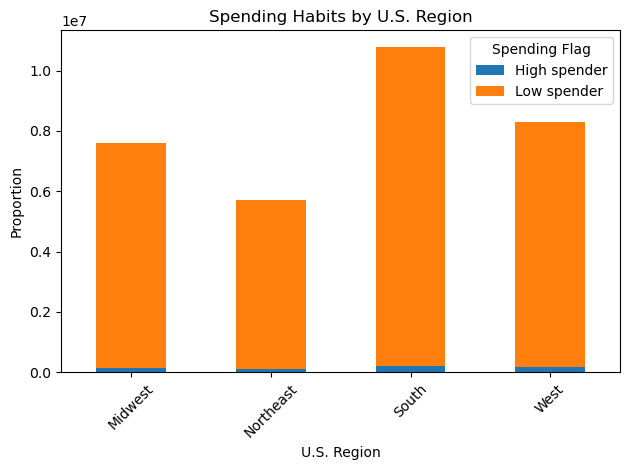

In [22]:
# Create a stacked bar chart
plt.figure(figsize=(10, 6))
spending_region.plot(kind='bar', stacked=True)
plt.title('Spending Habits by U.S. Region')
plt.xlabel('U.S. Region')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Spending Flag')
plt.tight_layout()

# Show the chart
plt.show()


# Exclude low-activity customers (customer with less than 5 orders)

In [23]:
# Calculate the number of orders per customer
order_counts = df['user_id'].value_counts()

# Get user IDs of high-activity customers (5 or more orders)
high_activity_users = order_counts[order_counts >= 5].index

# Filter the DataFrame to include only high-activity customers
df_high_activity = df[df['user_id'].isin(high_activity_users)]


In [24]:
# checking df_high_activity
df_high_activity.shape

(32401975, 30)

In [25]:
# Comparing to original df
df.shape

(32404859, 30)

# Export dataframe without low frequency customer

In [26]:
df_high_activity.to_pickle(os.path.join(path,'prepared data','all_data_above_5_orders'))